In [82]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D ,Input
from keras.layers import MaxPool2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import pandas as pd
import keras.backend as K
import cv2
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers


In [83]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar100.load_data()
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

In [84]:
# count = []
# for i in range(1000):
#   number = np.argmax(y_train[i])
#   if number not in count:
#     count.append(number)
#     if (y_train[i][number]==1):
#       plt.figure()
#       plt.title(number)
#       plt.imshow(x_train[i])

# for i in range(1000):
#   if y_train[i][67]==1:
#     plt.figure()
#     plt.imshow(x_train[i])

In [85]:
np.argmax(y_train[0])

19

In [86]:
# input = Input(shape=(32,32,3))
# x = Conv2D(128,3,activation='relu')(input)
# x = Conv2D(64,3,activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Conv2D(32,3,activation='relu')(x)
# x = MaxPool2D((2,2))(x)
# x = Conv2D(16,3,activation='relu')(x)
# x = Dropout(0.2)(x)

# y = Flatten()(x)
# y = Dense(128,activation='relu')(y)
# y = Dense(100,activation='softmax')(y)

# model = models.Model(input,y)


In [87]:
model = Sequential()
weight_decay = 0.0005

model.add(Conv2D(64, (3, 3), padding='same',
                  input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 64)       

In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [90]:
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 52s 33ms/step - loss: 5.2625 - acc: 0.1007 - val_loss: 4.6029 - val_acc: 0.1700
Epoch 2/50
1563/1563 [==============================] - 51s 33ms/step - loss: 4.3775 - acc: 0.2147 - val_loss: 4.1917 - val_acc: 0.2450
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 4.0185 - acc: 0.2909 - val_loss: 3.7675 - val_acc: 0.3507
Epoch 4/50
1563/1563 [==============================] - 51s 33ms/step - loss: 3.9210 - acc: 0.3325 - val_loss: 3.7321 - val_acc: 0.3884
Epoch 5/50
1563/1563 [==============================] - 51s 33ms/step - loss: 3.9012 - acc: 0.3605 - val_loss: 3.6221 - val_acc: 0.4205
Epoch 6/50
1563/1563 [==============================] - 51s 33ms/step - loss: 3.8644 - acc: 0.3792 - val_loss: 3.8729 - val_acc: 0.3883
Epoch 7/50
1563/1563 [==============================] - 51s 33ms/step - loss: 3.8425 - acc: 0.3947 - val_loss: 3.7810 - val_acc: 0.4154
Epoch 8/50
1563/1563 [==========================

In [137]:
model.save_weights("weights.h5")

In [128]:
layer_outputs = [layer.output for layer in model.layers[:-7]] # Getting all the ouputs of layers (mainly Conv layers)
layer_outputs

[<tf.Tensor 'conv2d_38/BiasAdd:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'activation_39/Relu:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_36/cond/Identity:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'dropout_28/cond/Identity:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'conv2d_39/BiasAdd:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'activation_40/Relu:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_37/cond/Identity:0' shape=(None, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_14/MaxPool:0' shape=(None, 16, 16, 64) dtype=float32>,
 <tf.Tensor 'conv2d_40/BiasAdd:0' shape=(None, 16, 16, 128) dtype=float32>,
 <tf.Tensor 'activation_41/Relu:0' shape=(None, 16, 16, 128) dtype=float32>,
 <tf.Tensor 'batch_normalization_38/cond/Identity:0' shape=(None, 16, 16, 128) dtype=float32>,
 <tf.Tensor 'dropout_29/cond/Identity:0' shape=(None, 16, 16, 128) dtype=float32>,
 <tf.Tensor 'co

In [138]:
a = model.layers[-9]
classifier_layer_names = [
    "flatten_5",'dense_10','activation_46','batch_normalization_43','dropout_33','dense_11','activation_47'
]
classifier_input = keras.Input(shape=a.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [139]:
classifier_model.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 4, 4, 256)]       0         
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               2097664   
_________________________________________________________________
activation_46 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)             

In [140]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Activation model from Image to Last layer before Flatten

In [171]:
img = keras.preprocessing.image.load_img('b.jpg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img,axis=0)
img.shape
#model.predict(img)

(1, 32, 32, 3)

In [142]:
class_number = np.argmax(model.predict(img))
print(class_number)
pred_value = model.predict(img)[0][class_number]
pred_value

88


0.30604428

In [144]:
activations = activation_model.predict(img) 
last_layer_activation = activations[27]
(last_layer_activation.shape)

(1, 4, 4, 256)

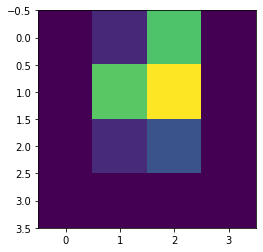

In [145]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
heatmap
plt.imshow(heatmap[0])

In [147]:
values = []
for i in range(256):
  activations = activation_model.predict(img) 
  last_layer_activation = activations[27]
  activation = last_layer_activation
  for j in range(4):
    for k in range(4):
      activation[0][j][k][i]=0
  #print(activation[0][0][0])
  prediction = classifier_model(activation)
  a= prediction[0][class_number]
  values.append(a.numpy())
values

[0.31393635,
 0.3146157,
 0.30473068,
 0.30604443,
 0.3130193,
 0.30604443,
 0.29654473,
 0.30604446,
 0.30704045,
 0.301583,
 0.30606237,
 0.29982424,
 0.3019536,
 0.30522716,
 0.32294065,
 0.305995,
 0.30604443,
 0.3078328,
 0.30604443,
 0.30288056,
 0.30988726,
 0.27715653,
 0.30639848,
 0.30604443,
 0.30426306,
 0.30563796,
 0.32454452,
 0.29919356,
 0.30604443,
 0.30962133,
 0.3019125,
 0.29509446,
 0.30630696,
 0.31678316,
 0.3036416,
 0.29637164,
 0.29773974,
 0.30604443,
 0.30627453,
 0.30606183,
 0.33021933,
 0.26835686,
 0.30604443,
 0.31436574,
 0.29926324,
 0.3060441,
 0.2812512,
 0.30025777,
 0.30604443,
 0.2976674,
 0.30647716,
 0.29505607,
 0.31153402,
 0.30604443,
 0.3060444,
 0.30574843,
 0.30545527,
 0.30604443,
 0.30018833,
 0.30397508,
 0.30881628,
 0.3001299,
 0.29898873,
 0.31597906,
 0.2972899,
 0.310062,
 0.31422725,
 0.30485123,
 0.31254968,
 0.30612314,
 0.29610363,
 0.2932339,
 0.3020804,
 0.30604443,
 0.30604443,
 0.30780837,
 0.30604443,
 0.29989904,
 0.305

In [148]:
aero = pred_value
aero = [aero]*256
weight_ratio = []
for i in range(256):
  b = (float(aero[i]) - float(values[i]))/float(aero[i])
  weight_ratio.append(b)
weight_ratio

[-0.02578735399705253,
 -0.02800711101277984,
 0.004292179424532254,
 -4.86895594588136e-07,
 -0.022790901128838224,
 -4.86895594588136e-07,
 0.031039788913231503,
 -5.842747135057632e-07,
 -0.0032549944289406068,
 0.01457726458549312,
 -5.910912518299971e-05,
 0.02032399590929797,
 0.01336625786263351,
 0.0026699406824835024,
 -0.055208896712110905,
 0.00016106506268975538,
 -4.86895594588136e-07,
 -0.005844013063603561,
 -4.86895594588136e-07,
 0.01033747512693855,
 -0.01255694000530911,
 0.09439074851628305,
 -0.0011573508283359993,
 -4.86895594588136e-07,
 0.005820155179468742,
 0.0013276669073229292,
 -0.06044954875490085,
 0.022384732823832798,
 -4.86895594588136e-07,
 -0.011688026127207122,
 0.013500641046739835,
 0.035778548977119996,
 -0.0008582995541399661,
 -0.03508929957342103,
 0.007850801946258023,
 0.031605366835905084,
 0.02713508100287249,
 -4.86895594588136e-07,
 -0.0007523510727575878,
 -5.735630104248242e-05,
 -0.07899199368360083,
 0.123143686200853,
 -4.8689559458

In [154]:
for i in range(256):
  for  j in range(4):
    for k in range(4):
      last_layer_activation[0][j][k][i]=last_layer_activation[0][j][k][i]*weight_ratio[i]
      if (last_layer_activation[0][j][k][i]< 0 ):
        last_layer_activation[0][j][k][i] = 0

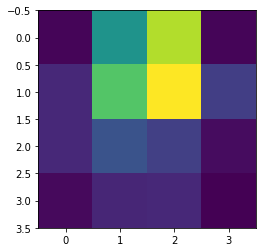

In [155]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

In [156]:
heatmap=heatmap[0,:,:,]
heatmap.shape

(4, 4)

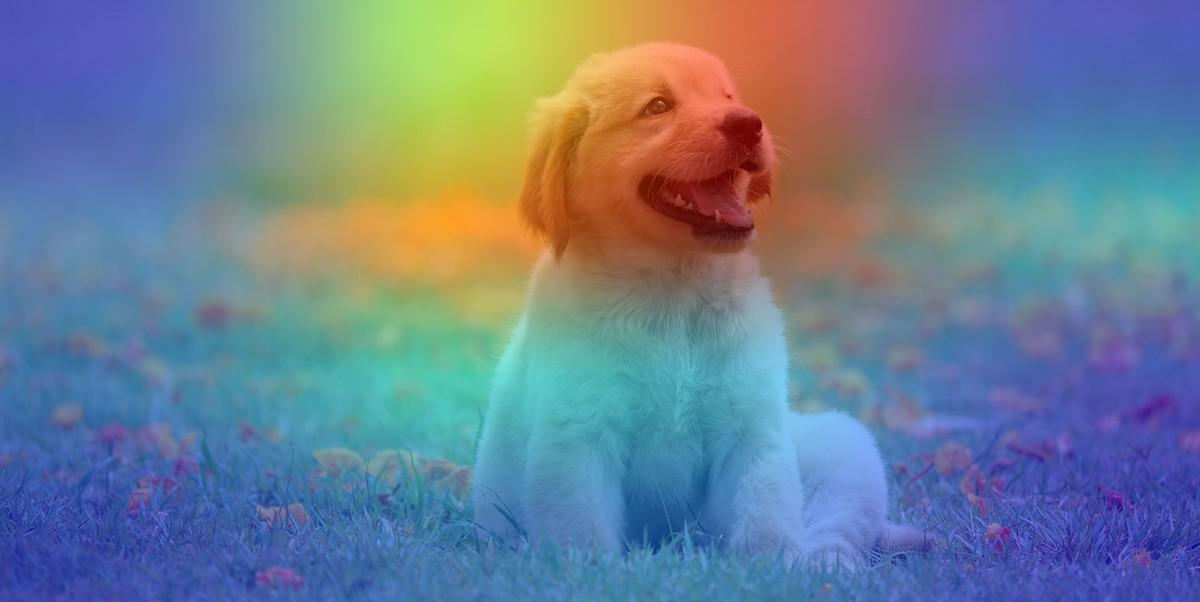

In [157]:
img = keras.preprocessing.image.load_img('b.jpg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap  + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_dog.jpg"
superimposed_img.save(save_path)
display(Image(save_path))

In [164]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
    last_conv_layer_model.summary()

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)
    classifier_model.summary()

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [168]:
last_conv_layer_name = 'dropout_32'
classifier_layer_names = [
    "flatten_5",'dense_10','activation_46','batch_normalization_43','dropout_33','dense_11','activation_47'
]
#img = np.expand_dims(img,axis=0)

In [172]:
heatmap = make_gradcam_heatmap(
    img, model, last_conv_layer_name, classifier_layer_names
)

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 64)      

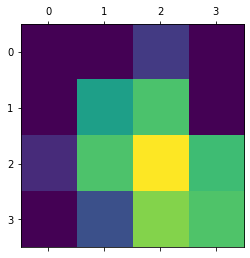

In [173]:
plt.matshow(heatmap)
plt.show()

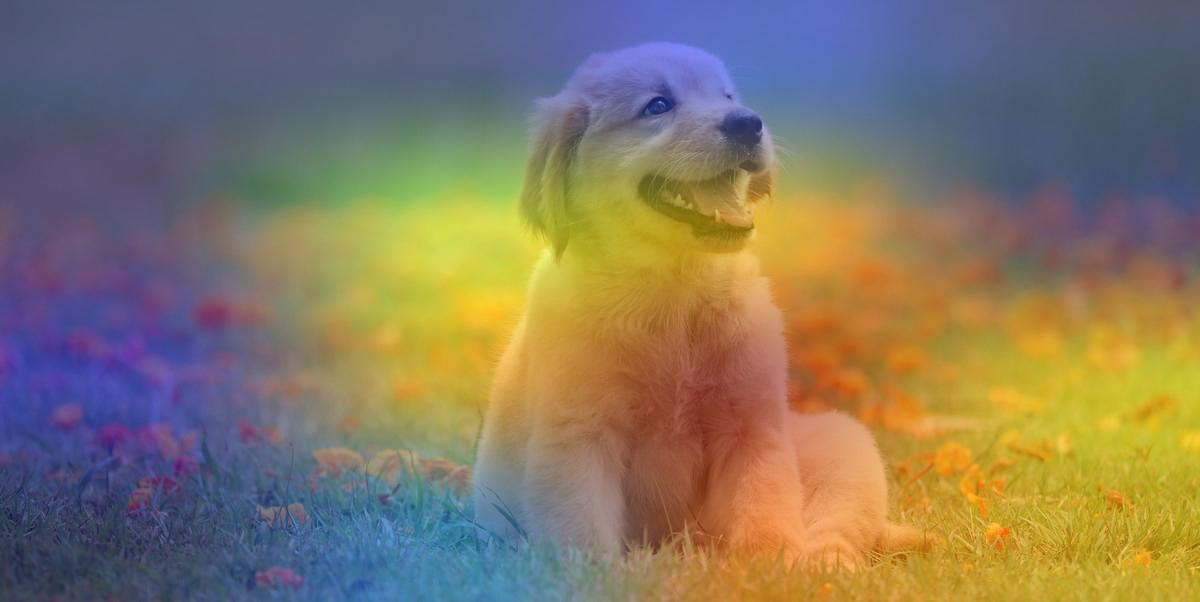

In [175]:
# We load the original image
img = keras.preprocessing.image.load_img('b.jpg')
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "man_gradcam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))
